/var/folders/md/0fgcrq7s4830qh0h1474lvrw0000gn/T/ipykernel_82847/1408281787.py:39: RuntimeWarning: divide by zero encountered in matmul
  y_pred = X @ w + b
/var/folders/md/0fgcrq7s4830qh0h1474lvrw0000gn/T/ipykernel_82847/1408281787.py:39: RuntimeWarning: overflow encountered in matmul
  y_pred = X @ w + b
/var/folders/md/0fgcrq7s4830qh0h1474lvrw0000gn/T/ipykernel_82847/1408281787.py:39: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ w + b
/var/folders/md/0fgcrq7s4830qh0h1474lvrw0000gn/T/ipykernel_82847/1408281787.py:43: RuntimeWarning: divide by zero encountered in matmul
  dw = (1 / m) * (X.T @ error)   # (n,)
/var/folders/md/0fgcrq7s4830qh0h1474lvrw0000gn/T/ipykernel_82847/1408281787.py:43: RuntimeWarning: overflow encountered in matmul
  dw = (1 / m) * (X.T @ error)   # (n,)
/var/folders/md/0fgcrq7s4830qh0h1474lvrw0000gn/T/ipykernel_82847/1408281787.py:43: RuntimeWarning: invalid value encountered in matmul
  dw = (1 / m) * (X.T @ error)   # (n,)
/var/folders/md

epoch=   0 loss=14855.661473
epoch= 200 loss=1445.153424
epoch= 400 loss=1441.791596
epoch= 600 loss=1439.469616
epoch= 800 loss=1437.864958
epoch=1000 loss=1436.755980
epoch=1200 loss=1435.989563
epoch=1400 loss=1435.459892
epoch=1600 loss=1435.093835
epoch=1800 loss=1434.840852
epoch=2000 loss=1434.666015
epoch=2200 loss=1434.545185
epoch=2400 loss=1434.461680
epoch=2600 loss=1434.403969
epoch=2800 loss=1434.364085
epoch=2999 loss=1434.336635

=== GD (NumPy) ===
w: [  1.76793055 -11.50634995  25.65720099  16.81275526 -41.84681056
  22.60557535   6.52905572  12.78142038  34.16267238   2.37020544]
b: 153.7365439093483
train MSE=2868.673  R2=0.528
 test MSE=2898.122  R2=0.453

=== sklearn LinearRegression ===
w: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
b: 153.73654390934846
train MSE=2868.550  R2=0.528
 test MSE=2900.194  R2=0.453


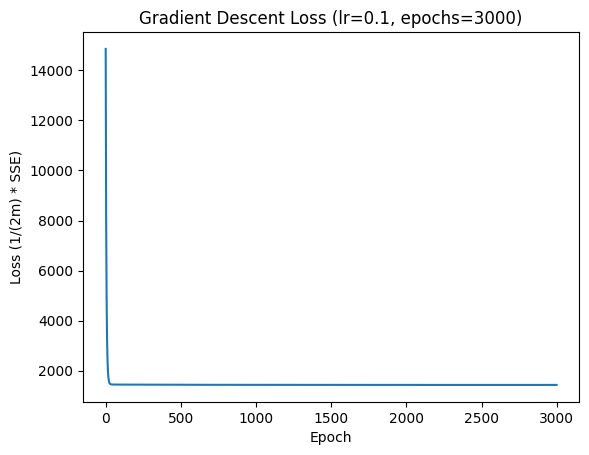


||w_gd - w_sk||_2 = 3.655029
|b_gd - b_sk| = 0.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


def compute_loss(X, y, w, b):
    """
    X: (m, n)
    y: (m,)
    w: (n,)
    b: scalar
    Возвращает loss = (1/(2m)) * sum((Xw + b - y)^2)
    """
    m = X.shape[0]
    y_pred = X @ w + b
    loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2) #функция потерь
    return loss

#обучение линейной регрессии, подбирая w и b так, чтобы loss был мин
def gradient_descent(X, y, lr=0.1, epochs=2000, verbose=False):
    """
    Реализует градиентный спуск для линейной регрессии:
    w, b обучаются вручную на NumPy.
    Возвращает (w, b, history_losses)
    """
    m, n = X.shape
    w = np.zeros(n, dtype=float) #заполняем матрицу 0.0
    b = 0.0

    losses = [] #значение ошибки на каждой эпохе чтобы построить график

    for epoch in range(epochs):
        # Forward
        y_pred = X @ w + b #прямой проход - предсказание
        error = y_pred - y  # (m,) считаем ошибку для кажого объекта

        # Gradients
        dw = (1 / m) * (X.T @ error)   # (n,)
        db = (1 / m) * np.sum(error)   # scalar

        # Update
        w -= lr * dw
        b -= lr * db

        # Track loss
        loss = (1 / (2 * m)) * np.sum(error ** 2)
        losses.append(loss) #сохраняем ошибку на этой эпохе

        #Печатай информацию только если verbose включён, и не на каждой эпохе, а иногда
        if verbose and (epoch % 200 == 0 or epoch == epochs - 1):
            print(f"epoch={epoch:4d} loss={loss:.6f}")
            
            """
            {epoch:4d} → epoch как целое число шириной 4 символа (чтобы красиво ровнялось)
            {loss:.6f} → loss с 6 знаками после запятой
            
            """

    return w, b, np.array(losses)


def main():
    # 1) Датасет (стабильный, встроенный в sklearn)
    data = load_diabetes()
    X = data.data          # (442, 10)
    y = data.target        # (442,)

    # 2) Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 3) Масштабирование (ВАЖНО для GD)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4) Наш GD
    lr = 0.1
    epochs = 3000
    w_gd, b_gd, losses = gradient_descent(
        X_train_scaled, y_train, lr=lr, epochs=epochs, verbose=True
    )

    # 5) Метрики для GD
    y_train_pred_gd = X_train_scaled @ w_gd + b_gd
    y_test_pred_gd = X_test_scaled @ w_gd + b_gd

    mse_train_gd = mean_squared_error(y_train, y_train_pred_gd)
    mse_test_gd = mean_squared_error(y_test, y_test_pred_gd)
    r2_train_gd = r2_score(y_train, y_train_pred_gd)
    r2_test_gd = r2_score(y_test, y_test_pred_gd)

    # 6) sklearn LinearRegression (для честного сравнения — те же scaled признаки)
    lr_sklearn = LinearRegression()
    lr_sklearn.fit(X_train_scaled, y_train)

    y_train_pred_sk = lr_sklearn.predict(X_train_scaled)
    y_test_pred_sk = lr_sklearn.predict(X_test_scaled)

    mse_train_sk = mean_squared_error(y_train, y_train_pred_sk)
    mse_test_sk = mean_squared_error(y_test, y_test_pred_sk)
    r2_train_sk = r2_score(y_train, y_train_pred_sk)
    r2_test_sk = r2_score(y_test, y_test_pred_sk)

    # 7) Печать сравнения
    print("\n=== GD (NumPy) ===")
    print("w:", w_gd)
    print("b:", b_gd)
    print(f"train MSE={mse_train_gd:.3f}  R2={r2_train_gd:.3f}")
    print(f" test MSE={mse_test_gd:.3f}  R2={r2_test_gd:.3f}")

    print("\n=== sklearn LinearRegression ===")
    print("w:", lr_sklearn.coef_)
    print("b:", lr_sklearn.intercept_)
    print(f"train MSE={mse_train_sk:.3f}  R2={r2_train_sk:.3f}")
    print(f" test MSE={mse_test_sk:.3f}  R2={r2_test_sk:.3f}")

    # 8) График loss по эпохам
    plt.figure()
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss (1/(2m) * SSE)")
    plt.title(f"Gradient Descent Loss (lr={lr}, epochs={epochs})")
    plt.show()

    # 9) (необязательно) сравнение коэффициентов
    diff_w = np.linalg.norm(w_gd - lr_sklearn.coef_)
    diff_b = abs(b_gd - lr_sklearn.intercept_)
    print(f"\n||w_gd - w_sk||_2 = {diff_w:.6f}")
    print(f"|b_gd - b_sk| = {diff_b:.6f}")


if __name__ == "__main__":
    main()


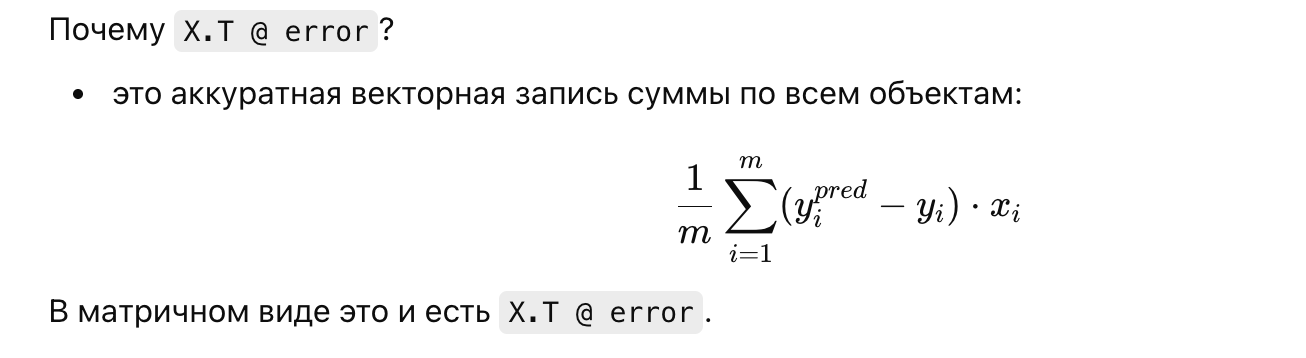